## Ten-minute (10MT) Analytics Challenge_Azure

*Data Resource*: https://www.kaggle.com/datasets/waqi786/most-used-beauty-cosmetics-products-in-the-world

*Presentation Video*: https://www.canva.com/design/DAGgLNAvuz8/C2KJqAyvQKSaPMhzValJ2A/view?utm_content=DAGgLNAvuz8&utm_campaign=designshare&utm_medium=link&utm_source=recording_view


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("most_used_beauty_cosmetics_products_extended.csv")

In [3]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_Name       15000 non-null  object 
 1   Brand              15000 non-null  object 
 2   Category           15000 non-null  object 
 3   Usage_Frequency    15000 non-null  object 
 4   Price_USD          15000 non-null  float64
 5   Rating             15000 non-null  float64
 6   Number_of_Reviews  15000 non-null  int64  
 7   Product_Size       15000 non-null  object 
 8   Skin_Type          15000 non-null  object 
 9   Gender_Target      15000 non-null  object 
 10  Packaging_Type     15000 non-null  object 
 11  Main_Ingredient    15000 non-null  object 
 12  Cruelty_Free       15000 non-null  bool   
 13  Country_of_Origin  15000 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(10)
memory usage: 1.5+ MB


In [4]:
# Display first 5 rows
df.head()

,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin
0,Ultra Face Mask,Drunk Elephant,Blush,Weekly,67.85,1.4,686,30ml,Sensitive,Female,Tube,Retinol,False,Australia
1,Ultra Lipstick,Laura Mercier,Makeup Remover,Occasional,116.43,4.2,5483,250ml,Dry,Unisex,Bottle,Shea Butter,False,UK
2,Ultra Serum,Natasha Denona,Highlighter,Daily,90.84,1.6,5039,100ml,Sensitive,Male,Compact,Aloe Vera,True,Italy
3,Divine Serum,Ilia Beauty,Face Mask,Occasional,55.17,3.2,6202,250ml,Normal,Male,Tube,Glycerin,True,South Korea
4,Super Foundation,Charlotte Tilbury,Highlighter,Occasional,140.56,1.7,297,100ml,Oily,Female,Compact,Glycerin,False,Germany


In [5]:
df.describe()

,Price_USD,Rating,Number_of_Reviews
count,15000.000000,15000.000000,15000.000000
mean,80.134108,3.002327,5014.231333
std,40.402983,1.168029,2855.665464
min,10.000000,1.000000,52.000000
25%,45.480000,2.000000,2562.000000
50%,80.040000,3.000000,5002.000000
75%,114.760000,4.000000,7497.000000
max,149.990000,5.000000,10000.000000


# Analyzing the Popularity of Beauty and Cosmetics Products  
I aim to determine the most **popular** beauty trend based on user engagement. Instead of ranking by the total number of reviews, which can be biased by frequently occurring entries, I use the **average number of reviews per unique occurrence**.  
 
I analyze the top 10/5 rankings for:  
- **Brands** – Which brands receive the highest engagement?  
- **Categories** – What types of products are the most reviewed on average?  
- **Countries of Origin** – Which countries produce the most engaging beauty products?
- **Skin Type** – Which skin type products get the most attention per occurrence?

After getting the results, I'll do some deeper analysis of these Top categories.

/var/folders/jz/2ck6trbn6m9_684vvkwnvzvr0000gn/T/ipykernel_5515/2440604886.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, ax=axes[0, 0], palette="plasma")
/var/folders/jz/2ck6trbn6m9_684vvkwnvzvr0000gn/T/ipykernel_5515/2440604886.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, ax=axes[0, 1], palette="magma")
/var/folders/jz/2ck6trbn6m9_684vvkwnvzvr0000gn/T/ipykernel_5515/2440604886.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_co

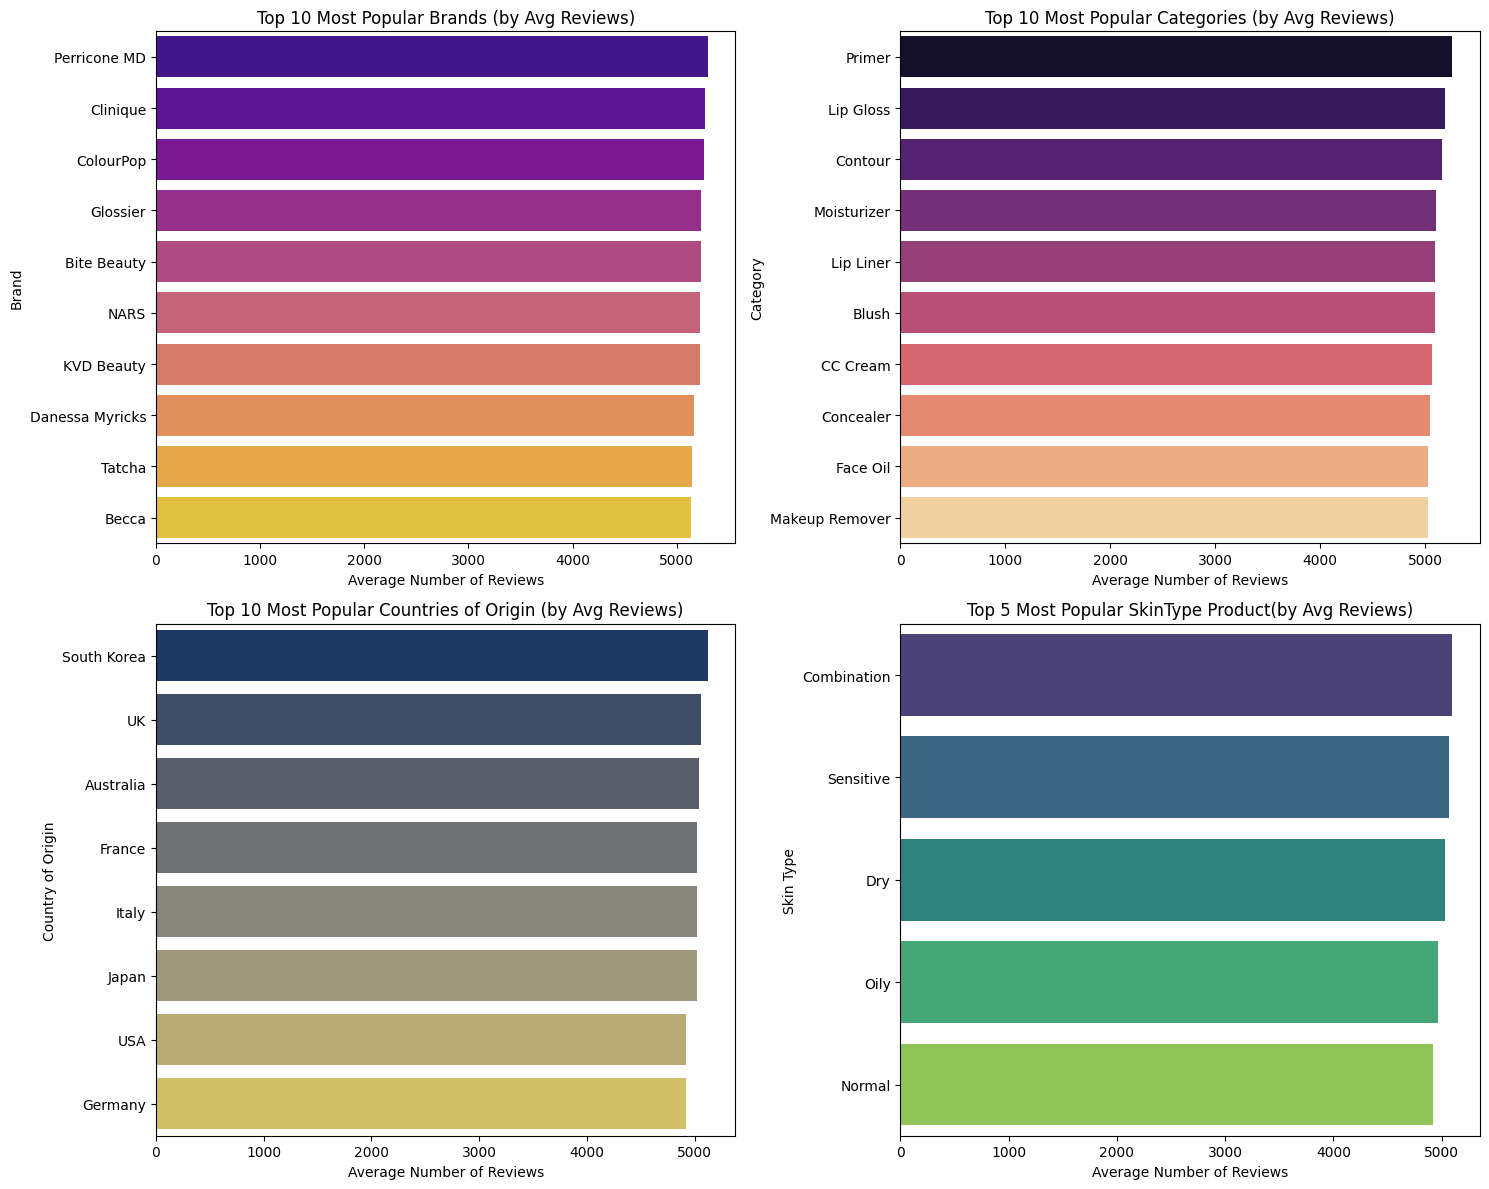

In [6]:
# Compute average reviews per unique occurrence
top_Skin_Type = (df.groupby("Skin_Type")["Number_of_Reviews"].sum() / df["Skin_Type"].value_counts()).nlargest(10)
top_brands = (df.groupby("Brand")["Number_of_Reviews"].sum() / df["Brand"].value_counts()).nlargest(10)
top_categories = (df.groupby("Category")["Number_of_Reviews"].sum() / df["Category"].value_counts()).nlargest(10)
top_countries = (df.groupby("Country_of_Origin")["Number_of_Reviews"].sum() / df["Country_of_Origin"].value_counts()).nlargest(10)

# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Top 10 Brands
sns.barplot(x=top_brands.values, y=top_brands.index, ax=axes[0, 0], palette="plasma")
axes[0, 0].set_title("Top 10 Most Popular Brands (by Avg Reviews)")
axes[0, 0].set_xlabel("Average Number of Reviews")
axes[0, 0].set_ylabel("Brand")

# Top 10 Categories
sns.barplot(x=top_categories.values, y=top_categories.index, ax=axes[0, 1], palette="magma")
axes[0, 1].set_title("Top 10 Most Popular Categories (by Avg Reviews)")
axes[0, 1].set_xlabel("Average Number of Reviews")
axes[0, 1].set_ylabel("Category")

# Top 10 Countries of Origin
sns.barplot(x=top_countries.values, y=top_countries.index, ax=axes[1, 0], palette="cividis")
axes[1, 0].set_title("Top 10 Most Popular Countries of Origin (by Avg Reviews)")
axes[1, 0].set_xlabel("Average Number of Reviews")
axes[1, 0].set_ylabel("Country of Origin")

# Top 5 Skin Type
sns.barplot(x=top_Skin_Type.values, y=top_Skin_Type.index, ax=axes[1, 1], palette="viridis")
axes[1, 1].set_title("Top 5 Most Popular SkinType Product(by Avg Reviews)")
axes[1, 1].set_xlabel("Average Number of Reviews")
axes[1, 1].set_ylabel("Skin Type")

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


## Analyzing the Most Popular Product Brand

To ensure that the most reviewed brands are not just popular but also well-received, I calculated their **average rating**. By analyzing the top brands based on average reviews, I can determine if their engagement is **positive or negative**. This helps differentiate between **highly rated** and **controversial** brands. 🚀  

In [47]:
# Compute the average rating for the top 10 brands based on average reviews
top_brands_list = top_brands.index  # Get the top brands from the previous ranking

# Calculate the average rating for these brands
top_brands_avg_rating = (
    df[df["Brand"].isin(top_brands_list)]
    .groupby("Brand")["Rating"]
    .mean()
    .sort_values(ascending=False)
)

# Convert the Series to a DataFrame
rating_df = top_brands_avg_rating.to_frame(name='Average Rating').reset_index()

# Apply formatting for better readability
styled_rating_df= rating_df.style.format({
    "Average Rating": "{:.2f}",
}).set_properties(**{"text-align": "center"})  # Align text in table

# Display formatted DataFrame
display(styled_rating_df)


,Brand,Average Rating
0,Becca,3.10
1,Bite Beauty,3.07
2,ColourPop,3.04
3,Perricone MD,3.01
4,Tatcha,3.00
5,NARS,3.00
6,KVD Beauty,2.96
7,Danessa Myricks,2.96
8,Glossier,2.95
9,Clinique,2.91


⬆️ I found the rating is not high and event lower than the overall mean (3.002327) among the top 10 brand.

Hence, **I'm going to find out what makes these brand popular**

In [43]:
# Define the top brands list
top_brands_list = ["Becca", "Bite Beauty", "ColourPop", "Perricone MD", "Tatcha",
                   "NARS", "KVD Beauty", "Danessa Myricks", "Glossier", "Clinique"]

# Filter only the top brands
df_top_brands = df[df["Brand"].isin(top_brands_list)]

# Compute the average price for top brands (formatted to 2 decimal places)
avg_price = df_top_brands.groupby("Brand")["Price_USD"].mean().round(2)

# Find the most common usage frequency for each brand
most_common_usage_freq = df_top_brands.groupby("Brand")["Usage_Frequency"].agg(pd.Series.mode)

# Identify the highest review product for each brand
top_reviewed_products = df_top_brands.loc[df_top_brands.groupby("Brand")["Number_of_Reviews"].idxmax(), 
                                          ["Brand", "Product_Name", "Number_of_Reviews", "Price_USD", "Rating"]]

# Merge all data into a final structured DataFrame
final_df = pd.DataFrame({
    "Brand": avg_price.index,
    "Average Price (USD)": avg_price.values,
    "Most Common Usage Frequency": most_common_usage_freq.values,
    "Top Reviewed Product": top_reviewed_products["Product_Name"].values,
    "Total Reviews": top_reviewed_products["Number_of_Reviews"].values,
    "Product Price (USD)": top_reviewed_products["Price_USD"].round(2).values,
    "Product Rating": top_reviewed_products["Rating"].round(2).values
})

# Define custom brand order
custom_brand_order = [
    "Perricone MD", "Clinique", "ColourPop", "Glossier", "Bite Beauty",
    "NARS", "KVD Beauty", "Danessa Myricks", "Tatcha", "Becca"
]

# Ensure the DataFrame follows the new brand order
final_df["Brand"] = pd.Categorical(final_df["Brand"], categories=custom_brand_order, ordered=True)
final_df = final_df.sort_values("Brand")

# Apply formatting for better readability
styled_final_df = final_df.style.format({
    "Average Price (USD)": "${:.2f}",
    "Total Reviews": "{:,}",  # Adds thousands separator
    "Product Price (USD)": "${:.2f}",
    "Product Rating": "{:.2f}"
}).set_properties(**{"text-align": "center"})  # Align text in table

# Display formatted DataFrame
display(styled_final_df)


,Brand,Average Price (USD),Most Common Usage Frequency,Top Reviewed Product,Total Reviews,Product Price (USD),Product Rating
8,Perricone MD,$79.36,Daily,Divine Lipstick,"9,970",$148.08,1.00
2,Clinique,$80.53,Monthly,Perfect Eye Shadow,"9,957",$138.02,4.80
3,ColourPop,$80.28,Occasional,Perfect Makeup Remover,"9,996",$134.04,4.30
5,Glossier,$80.87,Weekly,Ultra Lip Liner,"9,906",$36.61,3.30
1,Bite Beauty,$77.43,Weekly,Magic Setting Spray,"9,986",$127.62,4.80
7,NARS,$76.34,Weekly,Ultra Lip Liner,"9,995",$117.14,2.20
6,KVD Beauty,$81.20,Monthly,Ultra Cleanser,"9,997",$138.55,3.20
4,Danessa Myricks,$81.36,['Monthly' 'Weekly'],Super Mascara,"9,999",$98.94,1.50
9,Tatcha,$78.77,Weekly,Divine Concealer,"9,977",$134.50,4.20
0,Becca,$82.55,Monthly,Super Setting Spray,"9,977",$72.31,3.40


**Small Conclusion:**

From the analysis, we can infer that the popularity of a brand is not primarily driven by affordability or daily usage frequency. The average product price is relatively higher than overall mean($80.13), and the most common usage frequencies are mostly weekly or monthly, not daily.

**Key Findings:**
- Brands like **Clinique, ColourPop, and Bite Beauty** have higher-priced products that still maintain high ratings (4.3 - 4.8).
This suggests that reputation and perceived quality play a crucial role in their popularity.

- Many other brands' most popular products have low ratings (~1.0 - 3.3) despite high review counts.
This could indicate aggressive marketing, discounts, or advertisements leading to high sales but disappointing user experience.

### Identifying Top 10 Well-Reputed Brands  

Since the most of the Top 10 brand don't have great reputation. To determine the **true top brands with good reputation**, I filtered the dataset to find the **top 10 brands** based on **average number of reviews per product**, while ensuring they maintain a **rating of 4.0 or higher**. This will help separate brands that are truly well-received from those that are simply highly marketed but poorly rated.


,Brand,Number_of_Reviews,Price_USD_x,Product_Name,Category,Usage_Frequency,Price_USD_y
0,Bite Beauty,"5,748",$73.83,Magic Setting Spray,Eye Shadow,Occasional,$127.62
1,Morphe,"5,542",$80.82,Super Powder,Contour,Daily,$31.83
2,Danessa Myricks,"5,293",$88.04,Divine Concealer,Contour,Weekly,$78.22
3,Yves Saint Laurent,"5,277",$78.63,Super Cleanser,Makeup Remover,Monthly,$30.80
4,Becca,"5,258",$82.77,Perfect Primer,Mascara,Monthly,$45.69
5,Drunk Elephant,"5,155",$70.29,Perfect Makeup Remover,Serum,Weekly,$98.73
6,Bourjois,"5,127",$81.65,Magic Lip Gloss,Face Oil,Daily,$99.86
7,Ilia Beauty,"5,113",$78.44,Ultra Primer,Face Mask,Daily,$118.42
8,KVD Beauty,"5,107",$78.30,Perfect Cleanser,Mascara,Monthly,$68.98
9,Hourglass,"5,105",$80.89,Ultra Lip Gloss,Cleanser,Monthly,$26.74


/var/folders/jz/2ck6trbn6m9_684vvkwnvzvr0000gn/T/ipykernel_5515/1166656764.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_reputable_brands["Number_of_Reviews"], y=top_reputable_brands.index, palette="viridis")


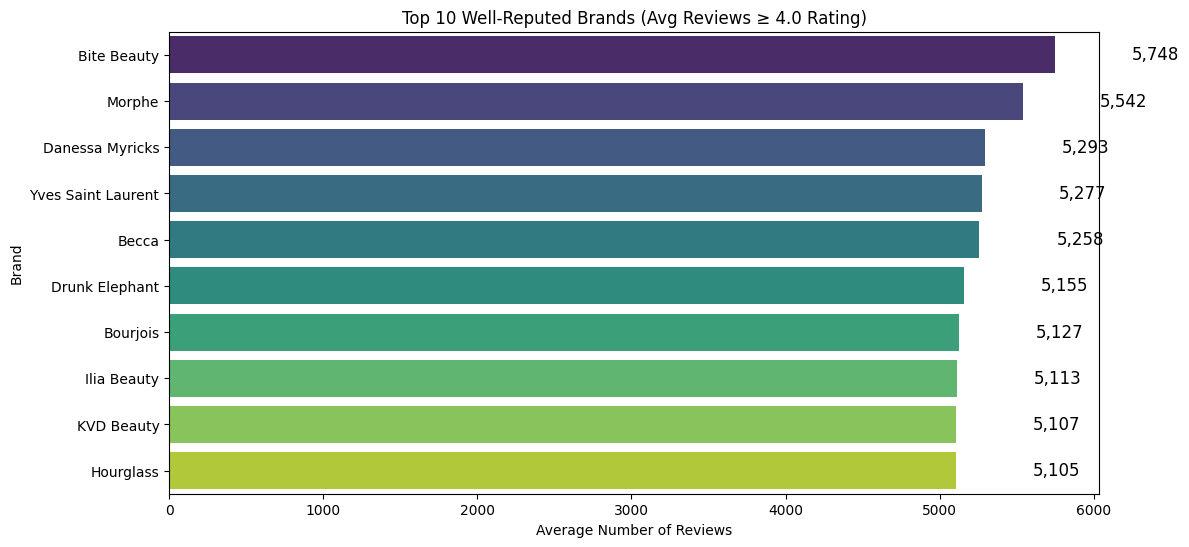

In [38]:
# Filter brands with rating ≥ 4.0
df_high_rated = df[df["Rating"] >= 4.0]

# Compute top 10 reputable brands by average number of reviews
top_reputable_brands = (df_high_rated.groupby("Brand")[["Number_of_Reviews", "Price_USD"]]
                        .mean()
                        .nlargest(10, "Number_of_Reviews"))

# Identify the best-selling product (highest reviews) for each brand
best_sellers = df_high_rated.loc[df_high_rated.groupby("Brand")["Number_of_Reviews"].idxmax(), 
                                 ["Brand", "Product_Name", "Category", "Usage_Frequency", "Price_USD"]]

# Merge brand data with best-selling product details
final_df = top_reputable_brands.merge(best_sellers, on="Brand")

# Style and format DataFrame for better readability
styled_final_df = final_df.style.format({
    "Number_of_Reviews": "{:,.0f}",  # Adds thousands separator
    "Price_USD_x": "${:.2f}",  # Formats avg price as dollars
    "Price_USD_y": "${:.2f}"  # Formats best-seller price as dollars
}).set_properties(**{"text-align": "center"})  # Aligns text in the table

# Display the styled DataFrame
display(styled_final_df)

# Create bar chart for top 10 reputable brands
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_reputable_brands["Number_of_Reviews"], y=top_reputable_brands.index, palette="viridis")

# Add value labels to bars
for i, value in enumerate(top_reputable_brands["Number_of_Reviews"]):
    ax.text(value + 500, i, f"{value:,.0f}", va='center', fontsize=12, color='black')

# Titles and labels
plt.title("Top 10 Well-Reputed Brands (Avg Reviews ≥ 4.0 Rating)")
plt.xlabel("Average Number of Reviews")
plt.ylabel("Brand")

# Show plot
plt.show()

#### Reputation Brands vs. Pricing Trends:

Interestingly, brands that are considered well-reputed (high avg. reviews & ratings) tend to have lower-than-average prices compared to the general market. This suggests that:

**High price, lower rating** → Customers may have higher expectations, so if a product doesn’t meet them, they leave harsher reviews.

**Lower price, higher rating** → Customers may feel the product offers great value for money, leading to higher satisfaction and better reviews.

**Cost Performance Ratio** → If a cheaper product performs well, people perceive it as a good deal, resulting in higher ratings.


This supports the idea that customers are more critical of expensive products and reward affordable but effective products with higher ratings

## Analyzing the Most Popular Product Categories

Understanding the **most popular product categories** (based on average reviews per product) can help us determine **which types of beauty products receive the most engagement**. This analysis can reveal:

**Key Questions to Explore:**
  
1. Do high-review categories also have high ratings?

2. Is there a price difference across popular categories?

,Number_of_Reviews,Rating,Price_USD
Category,,,
Primer,"5,259",3.04,$80.11
Lip Gloss,"5,187",2.95,$80.54
Contour,"5,157",3.13,$79.16
Moisturizer,"5,099",3.08,$81.58
Lip Liner,"5,093",2.89,$79.93
Blush,"5,092",2.98,$82.29
CC Cream,"5,062",3.07,$79.43
Concealer,"5,046",3.00,$78.79
Face Oil,"5,031",2.97,$79.51


/var/folders/jz/2ck6trbn6m9_684vvkwnvzvr0000gn/T/ipykernel_5515/3690728467.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories["Number_of_Reviews"], y=top_categories.index, palette="magma")


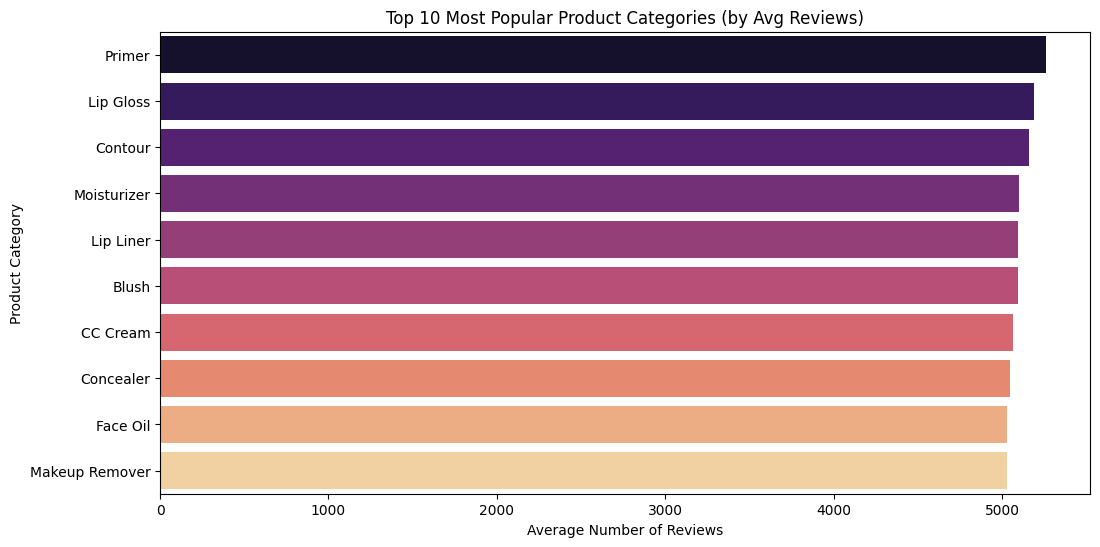

In [63]:
# Compute the top 10 categories based on average reviews per product
top_categories = (df.groupby("Category")[["Number_of_Reviews", "Rating", "Price_USD"]]
                  .mean()
                  .nlargest(10, "Number_of_Reviews"))

# Format the DataFrame for better readability
styled_top_categories = top_categories.style.format({
    "Number_of_Reviews": "{:,.0f}",  # Adds thousands separator
    "Rating": "{:.2f}",  # Rounds rating to 2 decimal places
    "Price_USD": "${:.2f}"  # Formats price as dollars
}).set_properties(**{"text-align": "center"})

# Display formatted table
display(styled_top_categories)


# Create bar chart for top 10 categories by avg reviews
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories["Number_of_Reviews"], y=top_categories.index, palette="magma")

# Add labels
plt.title("Top 10 Most Popular Product Categories (by Avg Reviews)")
plt.xlabel("Average Number of Reviews")
plt.ylabel("Product Category")

# Show plot
plt.show()


#### Insights from the Top 10 Most Popular Product Categories

**Key Findings:**
- Highly Reviewed Categories Have Moderate Ratings (~2.9 - 3.1)
 
Despite being the most reviewed, none of the top categories have an average rating above 3.2.
This suggests that high engagement may be driven by expectations, frequent repurchases, or even dissatisfaction.

- Price is Relatively Consistent (~$80)

The average price across top categories is fairly similar, around $79 - $82.
This indicates that price is not the main differentiator in category engagement.

## Analyzing the Most Popular Countries of Origin

Understanding the **top countries of origin** for beauty products helps us see **which countries dominate consumer engagement**. This analysis can answer:

### **Key Questions to Explore:**
1. **Does country of origin correlate with price and rating?**  
2. **What types of products are driving popularity in each country?**  


,Number_of_Reviews,Rating,Price_USD
Country_of_Origin,,,
South Korea,"5,121",3.01,$82.40
UK,"5,055",3.01,$79.16
Australia,"5,042",2.96,$80.74
France,"5,023",3.01,$79.24
Italy,"5,017",3.00,$79.93
Japan,"5,016",3.04,$78.77
USA,"4,923",3.00,$80.50
Germany,"4,920",3.00,$80.34


/var/folders/jz/2ck6trbn6m9_684vvkwnvzvr0000gn/T/ipykernel_5515/442664276.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries["Number_of_Reviews"], y=top_countries.index, palette="cividis")


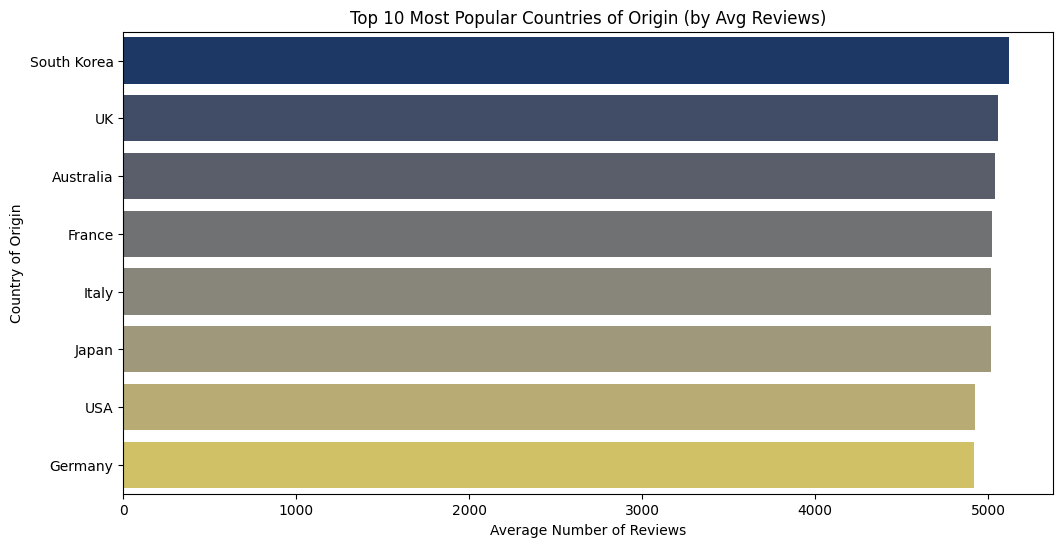

In [35]:
# Compute the top 10 most popular countries by average reviews per product
top_countries = (df.groupby("Country_of_Origin")[["Number_of_Reviews", "Rating", "Price_USD"]]
                 .mean()
                 .nlargest(10, "Number_of_Reviews"))

# DataFrame
styled_top_countries = top_countries.style.format({
    "Number_of_Reviews": "{:,.0f}",  # Adds thousands separator
    "Rating": "{:.2f}",  # Rounds rating to 2 decimal places
    "Price_USD": "${:.2f}"  # Formats price as dollars
}).set_properties(**{"text-align": "center"})

display(styled_top_countries)


# Create bar chart for top 10 countries by avg reviews
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries["Number_of_Reviews"], y=top_countries.index, palette="cividis")

# Add labels
plt.title("Top 10 Most Popular Countries of Origin (by Avg Reviews)")
plt.xlabel("Average Number of Reviews")
plt.ylabel("Country of Origin")

# Show plot
plt.show()

In [34]:
# Define the country order based on ranking
top_countries_list = ["South Korea", "UK", "Australia", "France", "Italy", "Japan", "USA", "Germany"]

# Filter dataset for only the top-ranked countries
df_top_countries = df[df["Country_of_Origin"].isin(top_countries_list)]

# Compute category statistics
category_stats = df_top_countries.groupby(["Country_of_Origin", "Category"]).agg(
    Mean_Rating=("Rating", "mean"),
    Aggregate_Reviews=("Number_of_Reviews", "sum"),
    Avg_Price=("Price_USD", "mean")
).reset_index()

# Get the highest-rated category per country
best_rated_category_per_country = category_stats.loc[category_stats.groupby("Country_of_Origin")["Mean_Rating"].idxmax()]

# DataFrame
best_rated_category_per_country["Country_of_Origin"] = pd.Categorical(
    best_rated_category_per_country["Country_of_Origin"], categories=top_countries_list, ordered=True
)
best_rated_category_per_country = best_rated_category_per_country.sort_values("Country_of_Origin")


styled_df = best_rated_category_per_country.style.format({
    "Mean_Rating": "{:.2f}",
    "Aggregate_Reviews": "{:,.0f}",
    "Avg_Price": "${:.2f}"
}).set_properties(**{"text-align": "center"})

# Display
display(styled_df)

,Country_of_Origin,Category,Mean_Rating,Aggregate_Reviews,Avg_Price
130,South Korea,Face Mask,3.34,"405,163",$79.46
147,UK,CC Cream,3.30,"423,803",$81.46
14,Australia,Lip Gloss,3.28,"318,805",$82.23
31,France,Exfoliator,3.23,"346,110",$75.76
91,Italy,Moisturizer,3.24,"385,648",$77.27
96,Japan,BB Cream,3.30,"481,685",$84.30
180,USA,Foundation,3.22,"330,080",$78.28
69,Germany,Primer,3.40,"370,200",$74.75


#### **Conclusion: Most Popular Countries of Origin & Their Top Product Categories**

**Key Findings**
- **South Korea dominates in skincare**, with **Face Masks** leading in popularity (Avg. Rating: 3.34).  
- **The UK & Japan's base makeup** (**CC Cream & BB Cream**) are popular and have high reputation among countries.   

## **Analyzing the Most Popular Skin Type Products**  

Understanding which **skin type products receive the most engagement** helps us identify **consumer needs, buying behavior, and industry trends**. This analysis explores:  

**Key Questions to Explore:**   
1. **Is high review engagement linked to product effectiveness or dissatisfaction?**  
2. **How do pricing influence the popularity of skin-type products?**
3. **What is the most common ingredients among different skintype products?**

In [52]:
# Check if high review engagement is linked to effectiveness (high rating) or dissatisfaction (low rating)
skin_type_review_analysis = df.groupby("Skin_Type").agg(
    Avg_Reviews=("Number_of_Reviews", "mean"),
    Avg_Rating=("Rating", "mean")
).reset_index()

# Analyze how pricing influences the popularity of skin-type products
skin_type_price_analysis = df.groupby("Skin_Type").agg(
    Avg_Reviews=("Number_of_Reviews", "mean"),
    Avg_Price=("Price_USD", "mean")
).reset_index()

# Identify the most common main ingredients for each skin type (if available)
if "Main_Ingredient" in df.columns:
    skin_type_main_ingredients = {}
    for skin_type in df["Skin_Type"].dropna().unique():
        ingredients_list = df[df["Skin_Type"] == skin_type]["Main_Ingredient"].dropna().str.split(",").sum()
        most_common_ingredients = Counter(ingredients_list).most_common(5)  # Get top 5 main ingredients
        skin_type_main_ingredients[skin_type] = [ingredient[0] for ingredient in most_common_ingredients]

    # DataFrame
    skin_type_main_ingredients_df = pd.DataFrame.from_dict(
        skin_type_main_ingredients, orient="index",
        columns=["Main_Ingredient_1", "Main_Ingredient_2", "Main_Ingredient_3", "Main_Ingredient_4", "Main_Ingredient_5"]
    ).reset_index().rename(columns={"index": "Skin_Type"})
else:
    skin_type_main_ingredients_df = None  # Main_Ingredient column is missing

# DataFrames
styled_review_df = skin_type_review_analysis.style.format({
    "Avg_Reviews": "{:,.0f}",
    "Avg_Rating": "{:.2f}"
}).set_properties(**{"text-align": "center"})

styled_price_df = skin_type_price_analysis.style.format({
    "Avg_Reviews": "{:,.0f}",
    "Avg_Price": "${:.2f}"
}).set_properties(**{"text-align": "center"})

if skin_type_main_ingredients_df is not None:
    styled_ingredients_df = skin_type_main_ingredients_df.style.set_properties(**{"text-align": "center"})
else:
    styled_ingredients_df = None

# Display 
from IPython.display import display

print("\nSkin Type Review vs Rating Analysis:")
display(styled_review_df)

print("\nSkin Type Price vs Popularity Analysis:")
display(styled_price_df)

if styled_ingredients_df is not None:
    print("\nMost Common Main Ingredients by Skin Type:")
    display(styled_ingredients_df)
else:
    print("\nMain_Ingredient data not available in the dataset.")



Skin Type Review vs Rating Analysis:


,Skin_Type,Avg_Reviews,Avg_Rating
0,Combination,"5,099",3.01
1,Dry,"5,027",3.00
2,Normal,"4,920",3.02
3,Oily,"4,962",2.99
4,Sensitive,"5,063",3.00



Skin Type Price vs Popularity Analysis:


,Skin_Type,Avg_Reviews,Avg_Price
0,Combination,"5,099",$79.83
1,Dry,"5,027",$81.51
2,Normal,"4,920",$79.98
3,Oily,"4,962",$79.88
4,Sensitive,"5,063",$79.50



Most Common Main Ingredients by Skin Type:


,Skin_Type,Main_Ingredient_1,Main_Ingredient_2,Main_Ingredient_3,Main_Ingredient_4,Main_Ingredient_5
0,Sensitive,Vitamin C,Salicylic Acid,Glycerin,Shea Butter,Retinol
1,Dry,Vitamin C,Shea Butter,Aloe Vera,Salicylic Acid,Retinol
2,Normal,Glycerin,Retinol,Hyaluronic Acid,Aloe Vera,Shea Butter
3,Oily,Retinol,Salicylic Acid,Glycerin,Shea Butter,Vitamin C
4,Combination,Retinol,Hyaluronic Acid,Salicylic Acid,Shea Butter,Vitamin C


## **Insights from Skin Type Analysis**

**Review Engagement vs. Rating**
- **Combination skin** has the **highest engagement** (5,099 avg. reviews), while **Oily skin** has the lowest (4,962 avg. reviews).

**Pricing Influence on Popularity**
- **Price differences among skin types are minimal**
- **Dry skin products are the most expensive** ($81.51 avg.).

**Common Main Ingredients for Each Skin Type**
- **Retinol, Salicylic Acid, and Shea Butter** appear across multiple skin types, indicating their **versatile use** in skincare.
- **Sensitive & Dry Skin**: **Vitamin C & Shea Butter** are common, likely due to their **soothing & hydrating properties**.
- **Oily Skin**: **Retinol & Salicylic Acid dominate**, aligning with their effectiveness in **controlling oil & acne**.
- **Combination Skin**: Has a blend of **hydration (Hyaluronic Acid, Shea Butter)** and **exfoliation (Salicylic Acid, Retinol)**.


#### Other trends:
Gender Target / Packaging Type / Main Ingredient / Cruelty-Free Status

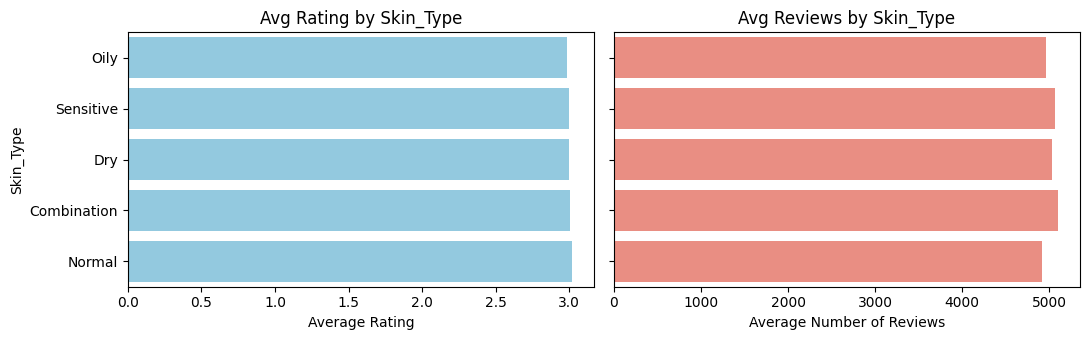

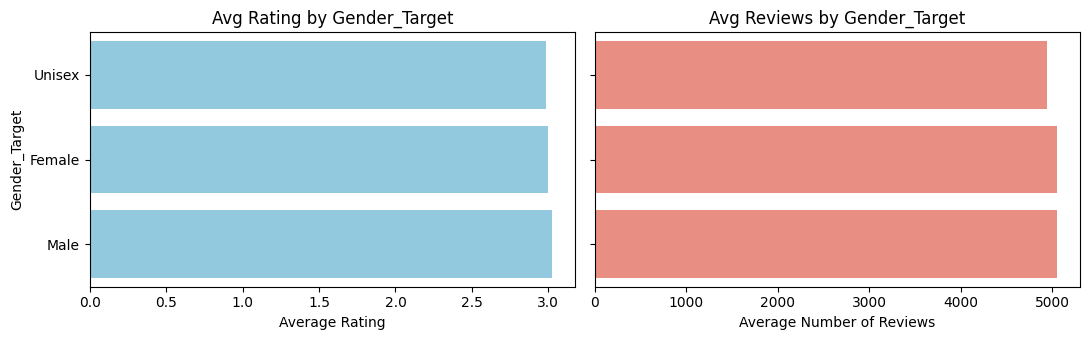

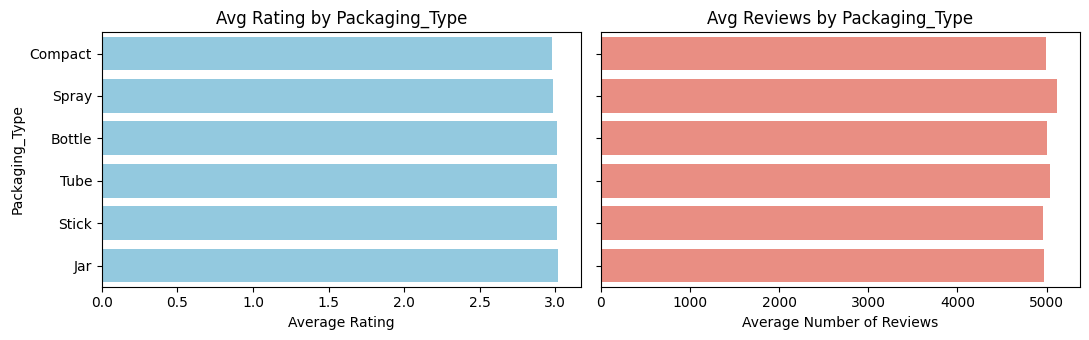

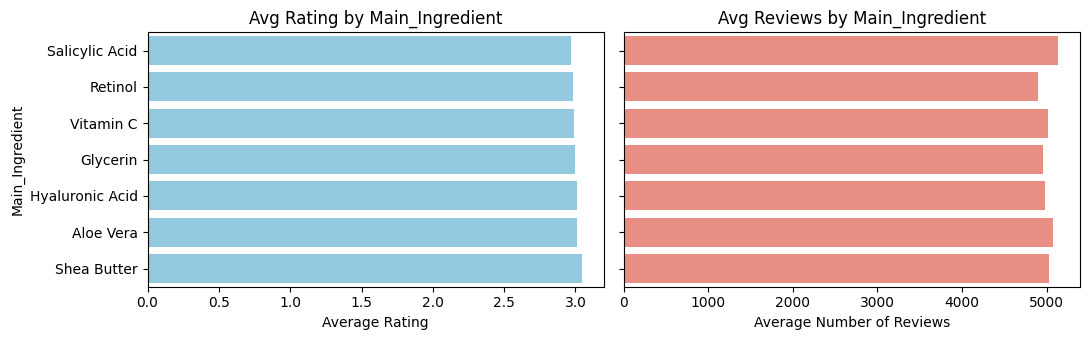

In [64]:

# Define categorical columns to analyze
categorical_columns = ["Skin_Type", "Gender_Target", "Packaging_Type", "Main_Ingredient"]

# Create side-by-side bar plots for rating and review analysis
for col in categorical_columns:
    if col in df.columns:
        fig, axes = plt.subplots(1, 2, figsize=(11, 3.5), sharey=True)

        # Average Rating
        avg_rating = df.groupby(col)["Rating"].mean().sort_values()
        sns.barplot(x=avg_rating.values, y=avg_rating.index, ax=axes[0], color="skyblue")
        axes[0].set_title(f"Avg Rating by {col}")
        axes[0].set_xlabel("Average Rating")
        axes[0].set_ylabel(col)

        # Average Reviews
        avg_reviews = df.groupby(col)["Number_of_Reviews"].mean().sort_values()
        sns.barplot(x=avg_reviews.values, y=avg_reviews.index, ax=axes[1], color="salmon")
        axes[1].set_title(f"Avg Reviews by {col}")
        axes[1].set_xlabel("Average Number of Reviews")
        axes[1].set_ylabel(col)

        plt.tight_layout()
        plt.show()


 #### Insights:
- **Skin Type**: Combination & Sensitive skin products get more reviews, ratings are similar across all types.
- **Gender Target**: Ratings remain steady, but Unisex has lower reviews than others.
- **Packaging Type**: Spray has slightly higher reviews than others.
- **Main Ingredients**: Aloe Vera, Salicylic Acid appear frequently in highly-reviewed products.

# **Overall Conclusion: Insights from Beauty Product Analysis**
  
#### **1. Popularity ≠ Quality**
- The most reviewed brands and products **do not necessarily have high ratings**.
- Many popular brands have **average ratings around 3.0**, suggesting that **high sales could be driven by marketing, promotions, or trend influence rather than product performance**.

#### **2. Pricing Has Minimal Impact on Popularity**
- The **average product price (~$80.13)** is consistent across different categories and brands.
- There is **no strong correlation** between a product's price and its review engagement—**expensive products can be either highly praised or heavily criticized**.

#### **3. Ingredient Trends Align with Skin Type Needs**
- **Oily skin products** frequently contain **Retinol & Salicylic Acid**, known for **acne & oil control**.
- **Dry and Sensitive skin products** are rich in **Vitamin C, Shea Butter, and Aloe Vera**, supporting hydration and barrier repair.
- **Combination skin** benefits from **both hydration (Hyaluronic Acid) and exfoliation (Salicylic Acid)**.

#### **4. Country Influence on Beauty Trends**
- **South Korea dominates** in overall popularity, likely due to its **strong reputation in skincare innovations**.

#### **5. Packaging & Cruelty-Free Considerations**
- **Skin Type**: Combination & Sensitive skin products get more reviews.
- **Packaging Type**: Spray has slightly higher reviews than others.
- **Main Ingredients**: Salicylic Acid appear frequently in highly-reviewed products.

# **Constraint**

- This dataset is Mock Dataset, real-world trends may not be accurately reflected.  
- Variations in **ratings, pricing, and reviews** are **minimal**, leading to limited differentiation across brands, categories, and countries.  
